# Decision Trees

## Learning outcomes

At the end of this lesson, you should be able:
    
_Explain how a decision tree  tofunctions and how to build one by hand._

Note: The appendices have an example of builidng a decision tree in python.   


## 20 Questions

In the traditional [20 Questions](https://en.wikipedia.org/wiki/Twenty_Questions) game, one player is chosen to be the answerer. That person chooses a subject (object) but does not reveal this to the others. All other players are questioners. They each take turns asking a question which can be answered with a simple "Yes" or "No." The questioners try to guess the answerers subject (object).

The Two Rules 

  Rule 1: Questioners ask Yes-or-No questions     
  Rule 2: Answerer responds with a Yes or a No    

Traditionally,first question is something like the following: 

  * "Is it animal?"  
  * "Is it vegetable?"  
  * "Is it mineral?"  
  
Suppose the answer is "Justin Bieber?"

Which would be a better first question?

"Is it Taylor Swift?" or "Is it animal?"   



## What is a tree?

What is a tree?  In mathematics, and more specifically in graph theory, a [tree](https://en.wikipedia.org/wiki/Tree_(graph_theory)) is a directed or an undirected graph in which any two vertices are connected by exactly one path. In other words, any acyclic connected graph is a tree.

A tree is an undirected graph G that satisfies any of the following equivalent conditions:  
* G is connected and has no cycles.   
* G is acyclic, and a simple cycle is formed if any edge is added to G.  
* G is connected, but is not connected if any single edge is removed from G.  

A rooted tree is a tree in which one vertex/node has been designated the root. The edges of a rooted tree can be assigned a natural orientation, either away from or towards the root, in which case the structure becomes a directed rooted tree. 

A vertex/node that does not split is called Leaf or Terminal node.     

A sub section of entire tree is called branch or sub-tree.  

A vertex/node, which is divided into sub-nodes is called parent node of sub-nodes where as sub-nodes are the child of parent node.   

![rooted tree](http://nikbearbrown.com/YouTube/MachineLearning/DecisionTrees/rooted_digraph.png )  
*Rooted Tree*

## What are Decision Trees?

A [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is a [supervised learning](https://en.wikipedia.org/wiki/Supervised_learning) algorithm that uses a tree-like graph or model of decisions and their outcomes.  The decision tree can be linearized into decision rules, where the outcome is the contents of the leaf node, and the conditions along the path form a conjunction in the if clause. In general, the rules have the form:

$if \quad condition1 \quad and \quad condition2 \quad and \quad condition3 \quad then \quad outcome$

Each node in the tree is a decisions/tests. Each path from the tree root to a leaf corresponds to a conjunction of attribute decisions/tests. The tree itself corresponds to a disjunction of these conjunctions.

In [1]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import matplotlib.pyplot as plt

In [2]:
def get_play_data():
    """Get the play data, from local csv or http://nikbearbrown.com."""
    if os.path.exists("play.csv"):
        df = pd.read_csv("play.csv", index_col=0)
    else:
        url = "http://nikbearbrown.com/YouTube/MachineLearning/DecisionTrees/play.csv"
        try:
            df = pd.read_csv(url)
        except:
            exit("-- Unable to download play.csv")

        with open("play.csv", 'w') as f:
            print("-- writing to local play.csv file")
            df.to_csv(f)

    return df

df_play = get_play_data()
print(df_play.to_string(), sep="\n", end="\n\n")

-- writing to local play.csv file
      Date  Temp   Outlook Humidity  Windy Play
0    5-Mar   hot     sunny     high  False   no
1    6-Mar   hot     sunny     high   True   no
2    7-Mar   hot  overcast     high  False  yes
3    8-Mar  cool      rain   normal  False  yes
4    9-Mar  cool  overcast   normal   True  yes
5   10-Mar  mild     sunny     high  False   no
6   11-Mar  cool     sunny   normal  False  yes
7   12-Mar  mild      rain   normal  False  yes
8   13-Mar  mild     sunny   normal   True  yes
9   14-Mar  mild  overcast     high   True  yes
10  15-Mar   hot  overcast   normal  False  yes
11  16-Mar  mild      rain     high   True   no
12  17-Mar  cool      rain   normal   True   no
13  18-Mar  mild      rain     high  False  yes



![decision tree play or n](http://nikbearbrown.com/YouTube/MachineLearning/DecisionTrees/Decision_Trees_C.png)

### Computing Entropy

To calculate entropy, we can calculate the information difference, $-p_1 \log p_1 - p_2 \log p_2$. Generalizing this to n events, we get:

$$
entropy(p_1, p_2, ... p_n) = -p_1 \log p_1 - p_2 \log p_2 ...  - p_n \log p_n 
$$

which is just the Shannon entropy

$$
H_1 (X) = - \sum_{i=1}^n p_i \log p_i. 
$$

For example, if entropy = $-1.0 \log (1.0) - 0.0 \log (0.0) = 0$ then this provides no information. If entropy = $-0.5 \log (0.5) - 0.5 \log (0.5) = 1.0$ then this provides one “bit” of information.  Note that when $P(X)$ is 0.5 one is most uncertain and the Shannon entropy is highest (i.e. 1). When $P(X)$ is either 0.0 or 1.0 one is most certain and the Shannon entropy is lowest (i.e. 0)

In [3]:
df_play.groupby('Play').size()

Play
no     5
yes    9
dtype: int64

#### Shannon entropy of Play (our outcome variable) 

For Play there are 9 "yes" and 5 are "no" and then

$$
ShannonEntropy[9,5]= -9/14 \log (9/14) - 5/14 \log (5/14) = 0.94  \quad bits
$$

This means that without a model one is very uncertain whether play is "yes" or "no"?


Suppose that for Play there are 13 "yes" and 1 are "no" and then 

$$
ShannonEntropy[13,1]= -13/14 \log (13/14) - 1/14 \log (1/14) = 0.37  \quad bits
$$ 

This means that even without a model one is very much more certain that play is "yes."


### Shannon entropy

The notion of using entropy as a measure of change in system state and dynamics comes both from [statistical physics](https://en.wikipedia.org/wiki/Entropy) and from [information theory](https://en.wikipedia.org/wiki/Entropy_(information_theory)). In statistical physics, entropy is a measure of disorder and uncertainty in a random variable; the higher the entropy, the greater the disorder. In the statistical physics context, the term usually refers to [Gibbs entropy](https://en.wikipedia.org/wiki/Entropy_(statistical_thermodynamics)), which measures the macroscopic state of the system as defined by a distribution of atoms and molecules in a thermodynamic system. Gibbs entropy is a measure of the disorder in the arrangements of its particles. As the position of a particle becomes less predictable, the entropy increases. For a classical system (i.e., a collection of classical particles) with a discrete set of microstates, if $E_i$ is the energy of microstate $i$, and $p_i$ is the probability that it occurs during the system's fluctuations, then the entropy of the system is

$$
S = -k_\text{B}\,\sum_i p_i \ln \,p_i
$$

The quantity $k_\text{B}$ is a physical constant known as [Boltzmann's constant](https://en.wikipedia.org/wiki/Boltzmann_constant), which, like the entropy, has units of heat capacity. The logarithm is dimensionless.

In information theory, entropy is also a measure of the uncertainty in a random variable. In this context, however, the term usually refers to the [Shannon entropy](https://en.wikipedia.org/wiki/Entropy_(information_theory)), which quantifies the expected value of the information contained in a message (or the expected value of the information of the probability distribution). The concept was introduced by [Claude E. Shannon](https://en.wikipedia.org/wiki/Claude_Shannon) in his 1948 paper "A Mathematical Theory of Communication." Shannon entropy establishes the limits to possible data compression and channel capacity.  That is, the entropy gives a lower bound for the efficiency of an encoding scheme (in other words, a lower bound on the possible compression of a data stream). Typically this is expressed in the number of ‘bits’ or ‘nats’ that are required to encode a given message. Given the probability of each of n events, the information required to predict an event is the distribution’s entropy. 

Low entropy means the system is very ordered, that is, very predictable. High entropy means the system is mixed, that is, very unpredictable; a lot of information is needed for prediction. 

The Shannon entropy can explicitly be written as

$$
E(X) = \sum_{i} {\mathrm{P}(x_i)\,\mathrm{I}(x_i)} = -\sum_{i} {\mathrm{P}(x_i) \log_b \mathrm{P}(x_i)},
$$

where b is the base of the logarithm used. Common values of b are 2, Euler's number $e$, and 10, and the unit of entropy is shannon for b = 2, nat for b = e, and hartley for b = 10.When b = 2, the units of entropy are also commonly referred to as bits.

The Shannon entropy is by far the most common information-theoretic measure there are others. Other information-theoretic measures include: plog,Rényi entropy, Hartley entropy, collision entropy, min-entropy, Kullback-Leibler divergence and the information dimension.

The Shannon entropy is the Rényi entropy with an alpha of one (see appendix). The Shannon entropy is a simple estimate of the expected value of the information contained in a message. It assumes independence and identically distributed random variables, which is a simplification when applied to word counts. In this sense it is analogous to naïve Bayes, in that it is very commonly used and thought to work well in spite of violating some assumptions upon which it is based.

The limiting value of $H_\alpha as \alpha \rightarrow 1$ is the Shannon entropy:

$$
H_1(X) = - \sum_{i=1}^n p_i \log p_i. 
$$


### Shannon entropy distribution 

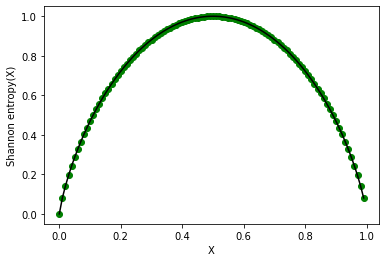

In [6]:
def shannon_entropy(p):   
    return (-p *np.log2(p) - (1-p)*np.log2(1-p))

base=0.0000000001
x = np.arange(base, 1.0-base, 0.01)


plt.figure(1)
plt.plot(x, shannon_entropy(x), 'go', x, shannon_entropy(x), 'k')
plt.ylabel('Shannon entropy(X)')
plt.xlabel('X')
plt.show()

Notice that when $P(X)$ is 0.5 one is most uncertain and the Shannon entropy is highest (i.e. 1). When $P(X)$ is either 0.0 or 1.0 one is most certain and the Shannon entropy is lowest (i.e. 0)

### Computing Information Gain

$$
Information Gain = entropy(parent) – [average entropy(children)]
$$

Note that since the entropy(parent) doesn't change the child node for which entropy is minimum is, equivalently, the child node for which information gain is maximum.  

Intuitively, low entropy means certainty and high entropy means uncertainty. A high information gain is equivalent to going from uncertainty to certainty.


### Let's Build a Decision Tree by Computing Information Gain

Building a decision tree is a simple algorithm once one understands the concept of entropy and information gain.  

1. Calculate the entropy of every attribute using the data set S, using the Shannon entropy.
2. Split the set S into subsets using the attribute for which entropy is minimum (or, equivalently, information gain is maximum)  
3. Make the decision tree (or sub-tree) root node that attribute.  
4. Recur on subsets using remaining attributes.  

In [7]:
df_play.describe()

,Date,Temp,Outlook,Humidity,Windy,Play
count,14,14,14,14,14,14
unique,14,3,3,2,2,2
top,5-Mar,mild,rain,high,False,yes
freq,1,6,5,7,8,9


In [9]:
df_play.describe().transpose()

,count,unique,top,freq
Date,14,14,5-Mar,1
Temp,14,3,mild,6
Outlook,14,3,rain,5
Humidity,14,2,high,7
Windy,14,2,False,8
Play,14,2,yes,9


In [10]:
df_play_yes=df_play.loc[df_play['Play'] == 'yes']
print(df_play_yes.to_string(), sep="\n", end="\n\n")

      Date  Temp   Outlook Humidity  Windy Play
2    7-Mar   hot  overcast     high  False  yes
3    8-Mar  cool      rain   normal  False  yes
4    9-Mar  cool  overcast   normal   True  yes
6   11-Mar  cool     sunny   normal  False  yes
7   12-Mar  mild      rain   normal  False  yes
8   13-Mar  mild     sunny   normal   True  yes
9   14-Mar  mild  overcast     high   True  yes
10  15-Mar   hot  overcast   normal  False  yes
13  18-Mar  mild      rain     high  False  yes



In [11]:
df_play_no=df_play.loc[df_play['Play'] == 'no']
print(df_play_no.to_string(), sep="\n", end="\n\n")

      Date  Temp Outlook Humidity  Windy Play
0    5-Mar   hot   sunny     high  False   no
1    6-Mar   hot   sunny     high   True   no
5   10-Mar  mild   sunny     high  False   no
11  16-Mar  mild    rain     high   True   no
12  17-Mar  cool    rain   normal   True   no



### Information gain for the for attribute Outlook

In [12]:
df_play_yes.groupby('Outlook').size()

Outlook
overcast    4
rain        3
sunny       2
dtype: int64

In [13]:
df_play_no.groupby('Outlook').size()

Outlook
rain     2
sunny    3
dtype: int64

#### Outlook is Sunny 

For Outlook = Sunny are there are 5 Sunny rows of which  2 are "yes" and 3 are "no" and then 

$$
ShannonEntropy[2,3]= -2/5 \log (2/5) - 3/5 \log (3/5) = 0.97  \quad bits
$$   

#### Outlook is Overcast

For Outlook = Overcast are there are 4 Overcast rows of which  4 are "yes" and 0 are "no" and then 

$$
ShannonEntropy[4,0]= - 1 \log (1) = 0.0 -0 \log (0)\quad bits  
$$
#### Outlook is Rain

For Outlook = Rain are there are 5 Rainy rows of which  3 are "yes" and 2 are "no" and then 

$$
ShannonEntropy[3,2]= - 3/5 \log (3/5) -2/5 \log (2/5)= 0.97  \quad bits
$$


#### Shannon entropy for the for attribute Outlook

So the Shannon entropy for the for attribute Outlook would be,

$$
ShannonEntropy([2,3],[0,4][3,2])= \frac{5}{14} \times 0.97 + \frac{4}{14} \times 0.0 + \frac{5}{14} \times 0.97 = 0.69 \quad bits
$$


#### Information gain for the for attribute Outlook

The information gain for the for attribute Outlook would be, (assuming [play has an entropy of 0.94)

$$
 InfoGain([play],[outlook])= 0.94 - 0.69 = 0.25 \quad bits
$$

### Double check our math in python

In [14]:
print("ShannonEntropy[2,3]= -2/5 log2(2/5) - 3/5 log2(3/5) = %.2f" % (shannon_entropy((2.0/5.0))))# Outlook is Sunny 
print("ShannonEntropy[4,0]= -4/4 log2(4/4) - 0/4 log2(0/4) = %.2f" % (0.0))# Outlook is Overcast
print("ShannonEntropy[3,2]= -3/5 log2(3/5) - 2/5 log2(2/5) = %.2f" % (shannon_entropy((3.0/5.0))))# Outlook is Rainy 
print("ShannonEntropy[3,2],[0,4],[3,2]) = %.2f bits" % ((5.0/14)*0.97+0.0+(5.0/14)*0.97)) # Outlook InfoGain

ShannonEntropy[2,3]= -2/5 log2(2/5) - 3/5 log2(3/5) = 0.97
ShannonEntropy[4,0]= -4/4 log2(4/4) - 0/4 log2(0/4) = 0.00
ShannonEntropy[3,2]= -3/5 log2(3/5) - 2/5 log2(2/5) = 0.97
ShannonEntropy[3,2],[0,4],[3,2]) = 0.69 bits


### Your turn.  Calculate  Information gain for the for attribute Windy

In [15]:
df_play_yes.groupby('Windy').size()

Windy
False    6
True     3
dtype: int64

In [16]:
df_play_no.groupby('Windy').size()

Windy
False    2
True     3
dtype: int64

#### Windy is Yes 

For Windy is yes,  Shannon_entropy[]= ?.   


#### Windy is No

For Windy is no,  Shannon_entropy[]= ?.   

#### Shannon_entropy for the for attribute Windy

So the Shannon_entropy gain for the for attribute Windy would be,

$$
 ShannonEntropy([],[])= ?
$$

#### Information gain for the for attribute Windy

The information gain for the for attribute Windy would be, (assuming [play has an entropy of 0.94)

$$
 InfoGain([play],[windy])= ? \quad bits
$$

### Quiz Answer.  Calculate Information gain for the for attribute Windy

#### Windy is Yes 

For Windy is yes, there are 3 "True" and 6 are "False" and then 

$$
ShannonEntropy[3,6]= -3/9 \log (3/9) - 6/9 \log (6/9) = 0.92  \quad bits  
$$

#### Windy is No

For Windy is no, there are 3 "True" and 2 are "False" and then 

$$
ShannonEntropy[3,2]= -3/5 \log (3/5) - 2/5 \log (2/5) = 0.97  \quad bits    
$$

#### Shannon entropy for the for attribute Windy

The Shannon entropy for the for attribute Outlook would be,

$$
 ShannonEntropy([3,6],[3,2])= \frac{9}{14} \times 0.92 + \frac{5}{14} \times 0.97 = 0.94 \quad bits
$$

#### Information gain for the for attribute Windy


The information gain for the for attribute Outlook would be, (assuming [play has an entropy of 0.94)

$$
 InfoGain([play],[outlook])= 0.94 - 0.94 = 0.0 \quad bits
$$

### Double check our math in python

In [14]:
print("ShannonEntropy[3,6]= -3/9 log2(3/9) - 6/9 log2(6/9) = %.2f" % (shannon_entropy((6.0/9.0)))) # Windy is Yes 
print("ShannonEntropy[3,2]= -3/5 log2(3/5) - 2/5 log2(2/5) = %.2f" % (shannon_entropy((3.0/5.0)))) # Windy is No
print("ShannonEntropy[3,6],[3,2]) = %.2f bits" % ((9.0/14)*0.92+(5.0/14)*0.97)) # Windy InfoGain

ShannonEntropy[3,6]= -3/9 log2(3/9) - 6/9 log2(6/9) = 0.92
ShannonEntropy[3,2]= -3/5 log2(3/5) - 2/5 log2(2/5) = 0.97
ShannonEntropy[3,6],[3,2]) = 0.94 bits


### Recap decision trees

  
* What is a tree?   
* What is meant by information gain?  
* How ia Shannon entropy calculated?  
* How easy is it read and interpret decision trees?  
* Could decision trees be used to identify most significant variables?  
* Could decision trees be used to identify a relation between two or more variables?   
* What assumptions are being made?  
* Might decision trees be susepable to over fitting? 



## Random forests

[Random forests](https://en.wikipedia.org/wiki/Random_forest) or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.


### Tree bagging 


The training algorithm for random forests applies the general technique of [bootstrap aggregating](https://en.wikipedia.org/wiki/Bootstrap_aggregating), or bagging, to tree learners. Given a training set $X = x_1, ..., x_n$ with responses $Y = y_1, ..., y_n$, bagging repeatedly ($B$ times) selects a random sample with replacement of the training set and fits trees to these samples 

 For $b = 1, ..., B$ 
 - Sample, with replacement, $B$ training examples from $X, Y$; call these $X_b, Y_b$.
 - Train a decision or regression tree $f_b \quad on \quad X_b, Y_b$.

After training, predictions for unseen samples ${mvar|x'}$ can be made by averaging the predictions from all the individual regression trees on ${mvar|x'}$ 

 $$\hat{f} = \frac{1}{B} \sum_{b=1}^Bf_b (x')$$

or by taking the majority vote in the case of decision trees.

This bootstrapping procedure leads to better model performance because it decreases the [Bias–variance dilemma](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff) of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); bootstrap sampling is a way of de-correlating the trees by showing them different training sets.

The number of samples/trees, $B$, is a free parameter. Typically, a few hundred to several thousand trees are used, depending on the size and nature of the training set. An optimal number of trees $B$ can be found using cross-validation, or by observing the _out-of-bag error_ the mean prediction error on each training sample $x_i$, using only the trees that did not have $x_i$ in their bootstrap sample. The training and test error tend to level off after some number of trees have been fit.







## Appendix

## Entropy and information gain

#### Plog

Plog (which we pronounce ‘plog, ’ for positive log) is simply the negative log of the frequency. As the value of plog increases, the frequency decreases. 

$$
E(X) = -\sum\ln{p_i}
$$



freq  | (base 2)  
----  | -------------  
0.5   |  1  
0.25  |  2  
1/16  |  5  

  

Big plog means low frequency.

#### Rényi entropies  

The [Rényi entropies](https://en.wikipedia.org/wiki/R%C3%A9nyi_entropy) generalize the Shannon entropy, the Hartley entropy, the min-entropy, and the collision entropy. As such, these entropies as an ensemble are often called the Rényi entropies (or the Rényi entropy, even though this usually refers to a class of entropies). The difference between these entropies is in the respective value for each of an order parameter called alpha: the values of alpha are greater than or equal to zero but cannot equal one. The Renyi entropy ordering is related to the underlying probability distributions and allows more probable events to be weighted more heavily. As alpha approaches zero, the Rényi entropy increasingly weighs all possible events more equally, regardless of their probabilities. A higher alpha (a) weighs more probable events more heavily. The base used to calculate entropies is usually base 2 or Euler's number base $e$. If the base of the logarithm is 2, then the uncertainty is measured in bits. If it is the natural logarithm, then the unit is nats. 

#### Rényi entropies	 

The Rényi entropy of order $\alpha$, where $\alpha \geq 0$  and $\alpha \neq 1$ , is defined as

$$
H_\alpha(X) = \frac{1}{1-\alpha}\log\Bigg(\sum_{i=1}^n p_i^\alpha\Bigg)
$$

Here, X is a discrete random variable with possible outcomes 1,2,...,n and corresponding probabilities $p_i \doteq \Pr(X=i) for i=1,\dots,n,$ and the logarithm is base 2. 


#### Hartley entropy

The Hartley entropy is the Rényi entropy with an alpha of zero. 

the probabilities are nonzero, $H_0$ is the logarithm of the cardinality of X, sometimes called the Hartley entropy of X:  

$$
H_0 (X) = \log n = \log |X|
$$

#### Shannon entropy 

The Shannon entropy is the Rényi entropy with an alpha of one. The Shannon entropy is a simple estimate of the expected value of the information contained in a message. It assumes independence and identically distributed random variables, which is a simplification when applied to word counts. In this sense it is analogous to naïve Bayes, in that it is very commonly used and thought to work well in spite of violating some assumptions upon which it is based.

The limiting value of $H_\alpha as \alpha \rightarrow 1$ is the Shannon entropy:

$$
H_1 (X) = - \sum_{i=1}^n p_i \log p_i. 
$$

#### collision entropy

The collision entropy is the Rényi entropy with an alpha of two and is sometimes just called "Rényi entropy," refers to the case $\alpha = 2$,

$$
H_2 (X) = - \log \sum_{i=1}^n p_i^2 = - \log P(X = Y)
$$

where $X$ and $Y$ are independent and identically distributed. 

#### min-entropy

The min-entropy is the Rényi entropy as the limit of alpha approaches infinity. The name min-entropy stems from the fact that it is the smallest entropy measure in the Rényi family of entropies. In the limit as $\alpha \rightarrow \infty$, the Rényi entropy $H_\alpha converges to the min-entropy H_\infty$:

$$
H_\infty(X) \doteq \min_i (-\log p_i) = -(\max_i \log p_i) = -\log \max_i p_i\,.
$$

Equivalently, the min-entropy $H_\infty(X)$ is the largest real number b such that all events occur with probability at most $2^{-b}$.


#### Kullback-Leibler divergence

[Kullback-Leibler divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) is a non-symmetric measure of the difference between two probability distributions. The Kullback-Leibler measure goes by several names: relative entropy, discrimination information, Kullback-Leibler (KL) number, directed divergence, informational divergence, and cross entropy. Kullback-Leibler divergence is a measure of the difference between the observed entropy and its excepted entropy. We calculate the KL divergence by weighting one distribution (like an observed frequency distribution) by the log of probabilities of some other distribution D2. For discrete probability distributions P and Q, the Kullback–Leibler divergence of Q from P is defined to be

$$
D_{\mathrm{KL}}(P\|Q) = \sum_i P(i) \, \ln\frac{P(i)}{Q(i)}
$$

In words, it is the expectation of the logarithmic difference between the probabilities P and Q, where the expectation is taken using the probabilities P.


#### Mutual Information

[Mutual information](https://en.wikipedia.org/wiki/Mutual_information) quantifies the mutual dependence of the two random variables. It is a measure of the “stickiness” between two items. It measures how much knowing one of these variables reduces uncertainty about the other. We can use mutual information to quantify the association between two tags. Mutual information is given by:

the mutual information of two discrete random variables X and Y can be defined as:

$$
 I(X;Y) = \sum_{y \in Y} \sum_{x \in X} 
                 p(x,y) \log{ \left(\frac{p(x,y)}{p(x)\,p(y)}
                              \right) }, \,\!
$$                              
                              
where $p(x,y)$ is the joint probability distribution function of $X$ and $Y$, and $p(x)$ and $p(y)$ are the marginal probability distribution functions of $X$ and $Y$ respectively. In the case of continuous random variables, the summation is replaced by a definite double integral:

$$
 I(X;Y) = \int_Y \int_X 
                 p(x,y) \log{ \left(\frac{p(x,y)}{p(x)\,p(y)}
                              \right) } \; dx \,dy,
$$
 
where $p(x,y)$ is now the joint probability density function of $X$ and $Y$, and $p(x$) and $p(y)$ are the marginal probability density functions of $X$ and $Y$ respectively.



### Gini Index

The [Gini coefficient](https://en.wikipedia.org/wiki/Gini_coefficient) (sometimes expressed as a Gini ratio or a normalized Gini index) is a measure of homogeneity. A Gini coefficient (G) of zero expresses perfect equality, where all values are the same. A Gini coefficient of 1 (or 100%) expresses maximal inequality among values. G is a measure of inequality, defined as the mean of absolute differences between all pairs of individuals for some measure.


### Chi-Square

A [chi-squared test](https://en.wikipedia.org/wiki/Chi-squared_test), also written as $\chi^2$ test, is any statistical hypothesis test wherein the sampling distribution of the test statistic is a chi-squared distribution when the null hypothesis is true. It is used to test the statistical significance between the differences between sub-nodes and parent node. 

We measure it by sum of squares of standardized differences between observed and expected frequencies of sample population. Chi-squared tests are often constructed from a sum of squared errors, or through the sample variance. Test statistics that follow a chi-squared distribution arise from an assumption of independent normally distributed data. A chi-squared test can be used to attempt rejection of the null hypothesis that the data are independent.

The higher the value of Chi-Square, the higher the statistical significance of differences between two populations.

Chi-Square of each node is calculated using formula and the observed, $O$, and expected, $E$, frequencies of sample population.

$$
\tilde{\chi}^2=\frac{1}{d}\sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}\
$$

### Reduction in Variance


Reduction in variance is often used to calculate information gain when one has continuous variables rather than categorical variables.

The variance reduction of a node $N$ is defined as the total reduction of the variance of the target variable $x$ due to the split at this node:

$$
I_{V}(N) = \frac{1}{|S|^2}\sum_{i\in S} \sum_{j\in S} \frac{1}{2}(x_i - x_j)^2 - \left(\frac{1}{|S_t|^2}\sum_{i\in S_t} \sum_{j\in S_t} \frac{1}{2}(x_i - x_j)^2 + \frac{1}{|S_f|^2}\sum_{i\in S_f} \sum_{j\in S_f} \frac{1}{2}(x_i - x_j)^2\right)
$$

where $S$, $S_t$, and $S_f$ are the set of presplit sample indices, set of sample indices for which the split test is true, and set of sample indices for which the split test is false, respectively. Each of the above summands are indeed [variance](https://en.wikipedia.org/wiki/Variance) estimates, though, written in a form without directly referring to the mean.



### ID3 algorithm

This idea of iteratively finding the attribute with the most information gain to find a root in decision tree learning is called the  [ID3 (Iterative Dichotomiser 3)](https://en.wikipedia.org/wiki/ID3_algorithm) algorithm. The invented by [Ross Quinlan](https://en.wikipedia.org/wiki/Ross_Quinlan). It is a simple algorithm once one understands the concept of entropy and information gain.  

1.  Calculate the entropy of every attribute using the data set S, using the Shannon entropy.
2. Split the set S into subsets using the attribute for which entropy is minimum (or, equivalently, information gain is maximum)  
3. Make the decision tree (or sub-tree) root node that attribute.  
4. Recur on subsets using remaining attributes.  


### C4.5 algorithm

[C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm) is an extension of Quinlan's earlier ID3 algorithm. The splitting criterion is based on statistical confidence estimates. This technique has the advantage that it allows all of the available labeled data to be used for training. To generate this confidence one calculates the error rate over $n$ labled training instances. The observed error rate $e$ is analaogous to the observed fraction of heads in $n$  tosses of a biased coin (i.e. the probability of heads may not be 0.5). One wishes to estimate the true error rate, $p$ from the observed error rate $e$.   

The confidence interval, is calculated as follows, if one chooses a level of confidence $z$ then 

$$
p = e + z \times \sqrt{e \times \frac{1-e}{n}}
$$  

Paired values for z and confidence levels (z,confidence) are in the following lists: (0.67 z, 50% confidence), (1.0 z, 68% confidence) , (1.64 z, 90% confidence) and (1.96 z, 95% confidence).


### Constraints on Tree Size

When creating a decision tree, there is a trade-off between its simplicity and predictive power. A deep tree with many leaves is usually over-fitting the training data. In contrast, a shallow tree may not have high training accuracy. 

One wants a tree that is deep enough to be accurate on the training data while being shallow enough to be predictive on a wide range of data. As a rule of thumb, a depth of the square root of the total number of features should be in the ballpark but we should always check the tree through cross-validatiion and how sensible the rules generated are.

### Overfitting

The idea of overfitting means that your prediction model is too biased towards your training data. To limit overfitting two things are usually done:

  * Limit the tree size (see above)    
  * Prune the decision trees (see below)   

### Pruning

The [pruning](https://en.wikipedia.org/wiki/Pruning_(decision_trees)) (of a node) in a decision tree, reduces the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting.

Pruning can occur in a top down or bottom up fashion. A top down pruning will traverse nodes and trim subtrees starting at the root, while a bottom up pruning will start at the leaf nodes. Below are several popular pruning algorithms.

#### Reduced error pruning  

One of the simplest forms of pruning is reduced error pruning. Starting at the leaves, each node is replaced with its most popular class. If the prediction accuracy is not affected then the change is kept. While somewhat naive, reduced error pruning has the advantage of simplicity and speed.

#### Cost complexity pruning

Cost complexity pruning generates a series of trees $T_0 . . . T_m$ where $T_0$ is the initial tree and $T_m$ is the root alone. At step $i$ the tree is created by removing a subtree from tree $i-1$ and replacing it with a leaf node with value chosen as in the tree building algorithm. The subtree that is removed is chosen as follows. Define the error rate of tree $T$ over data set $S$ as $err(T,S)$. The subtree that minimizes 

$$\frac{err(prune(T,t),S)-err(T,S)}{|leaves(T)|-|leaves(prune(T,t))|}$$

is chosen for removal. The function prune(T,t) defines the tree gotten by pruning the subtrees t from the tree T. Once the series of trees has been created, the best tree is chosen by generalized accuracy as measured by a training set or cross-validation.



### Classification vs Regression Trees

Types of decision tree is based on the type of target variable we have. It can be of two types:

Classification Tree (Categorical Response Variable Decision Tree): Decision Tree which separates the dataset into classes belonging to the categorical target variable. Usually the response variable has two classes: Yes or No (1 or 0).  

Regression trees (Continuous Response Variable Decision Tree): If a decision Tree has continuous target variable it is applicable for prediction type of problems as opposed to classification.


### Decision Trees Pros and Cons

#### Advantages

Easy to Understand: Decision tree output is very easy to interpret. One can often check the rules to see if they make sense.

Significant Variables: Decision tree is one of the fastest way to identify most significant variables and relation between two or more variables. 

Non Parametric: Decision treea are usually created with non-parametric algorithms. Non-parametric models do not require the modeler to make any assumptions about the distribution of the population, and so are sometimes referred to as a distribution-free method. 

#### Disadvantages

Over fitting: Over fitting is easy with decision trees. Limiting the tree depth, cross-validation and pruning are essential to creating robust trees. 
 

### Random forests

[Random forests](https://en.wikipedia.org/wiki/Random_forest) or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set. 

The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set $X = x_1, ..., x_n$ with responses $Y = y_1, ..., y_n$, bagging repeatedly (B times) selects a random sample with replacement of the training set and fits trees to these samples:

For $b = 1, ..., B$:   

*  Sample, with replacement, B training examples from $X, Y$; call these $X_b, Y_b$.   
*  Train a decision or regression tree $f_b on X_b, Y_b$.  
*  After training, predictions for unseen samples $x'$ can be made by averaging the predictions from all the individual regression trees on $x'$:  

$$
\hat{f} = \frac{1}{B} \sum_{b=1}^Bf_b (x')
$$

or by taking the majority vote in the case of decision trees.

This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); bootstrap sampling is a way of de-correlating the trees by showing them different training sets.

The number of samples/trees, $B$, is a free parameter. Typically, a few hundred to several thousand trees are used, depending on the size and nature of the training set. An optimal number of trees $B$ can be found using cross-validation, or by observing the out-of-bag error: the mean prediction error on each training sample $x_i$, using only the trees that did not have $x_i$ in their bootstrap sample. The training and test error tend to level off after some number of trees have been fit.


### Decision Trees in python

In [15]:
# Example from sklearn documentaion http://scikit-learn.org/stable/modules/tree.html
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
print(iris.data)
print(iris.target)

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.   3.2  1.2  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 4.4  3.   1.3  0.2]
 [ 5.1  3.4  1.5  0.2]
 [ 5.   3.5  1.3  0.3]
 [ 4.5  2.3  1.3  0.3]
 [ 4.4  3.2  1.3  0.2]
 [ 5.   3.5

In [16]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [17]:
def visualize_tree(tree,f):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    """  
    with open(f, 'w') as f:
        export_graphviz(tree, out_file=f) 
    command = ["dot", "-Tpng", f, "-o", "o.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [18]:
visualize_tree(clf, "iris.dot")

![decision tree iris data](http://nikbearbrown.com/YouTube/MachineLearning/DecisionTrees/iris_clf.png)![rooted tree] 
*decision tree iris data*

Last update September 13, 2017